## Lesson 09 — Pandas Part III: Group operations

### Readings

* [_Data Aggregation and Group Operations_, by Wes McKinney](https://wesmckinney.com/book/data-aggregation)

### Table of Contents

* [Index operations](#Index-operations)
* [Melt](#melt)
* [Groupby](#groupby)
* [Pivot](#pivot)
* [Pivot table](#pivot_table)
* [Stack](#stack)
* [Unstack](#unstack)
* [Example: Group operations with Foreigners statistics Germany](#Example:-Group-operations-with-Foreigners-statistics-Germany)

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# set max rows
pd.set_option("display.max_rows", 20)

### Index operations

We can use `index.name` and `reset_index` to manipulate our index.

In [4]:
# create dataframe
df = pd.read_csv("../data/employment-12211-9008_en.csv", index_col=0)
df

,Sector,Year,Female,Male,Total
Variable,,,,,
WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...
WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000


In [5]:
# remove index name
df.index.name = None
df

,Sector,Year,Female,Male,Total
WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...
WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000
WZ08-U,Extraterritorial organisations and bodies,2018,11000,11000,22000


In [6]:
df.index.name = "Identifier"
df

,Sector,Year,Female,Male,Total
Identifier,,,,,
WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...
WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000


In [7]:
# reset index with inplace=True (also see more advanced function pandas.DataFrame.reindex)
df.reset_index(inplace=True)
df

,Identifier,Sector,Year,Female,Male,Total
0,WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
1,WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
2,WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
3,WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
4,WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...,...
226,WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
227,WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
228,WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000
229,WZ08-U,Extraterritorial organisations and bodies,2018,11000,11000,22000


In [8]:
# check datatypes to make sure everything is correct
df.dtypes

Identifier    object
Sector        object
Year           int64
Female         int64
Male           int64
Total          int64
dtype: object

### melt

Massage a DataFrame into a format where one or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

<center>
<img src="../images/reshaping_melt.png" width="60%"/>
</center>

In [9]:
df

,Identifier,Sector,Year,Female,Male,Total
0,WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
1,WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
2,WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
3,WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
4,WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...,...
226,WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
227,WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
228,WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000
229,WZ08-U,Extraterritorial organisations and bodies,2018,11000,11000,22000


In [10]:
# set max rows
pd.set_option("display.max_rows", 80)

In [11]:
# We are going to learn about melt later in this class, but this will server for the group by statements
df_melted = pd.melt(
    df, id_vars=["Sector", "Year"], value_vars=["Male", "Female", "Total"], var_name="Gender", value_name="Value"
)
df_melted

,Sector,Year,Gender,Value
0,"Agriculture, forestry and fishing",2009,Male,428000
1,"Agriculture, forestry and fishing",2010,Male,423000
2,"Agriculture, forestry and fishing",2011,Male,426000
3,"Agriculture, forestry and fishing",2012,Male,413000
4,"Agriculture, forestry and fishing",2013,Male,387000
...,...,...,...,...
688,Extraterritorial organisations and bodies,2015,Total,18000
689,Extraterritorial organisations and bodies,2016,Total,19000
690,Extraterritorial organisations and bodies,2017,Total,21000
691,Extraterritorial organisations and bodies,2018,Total,22000


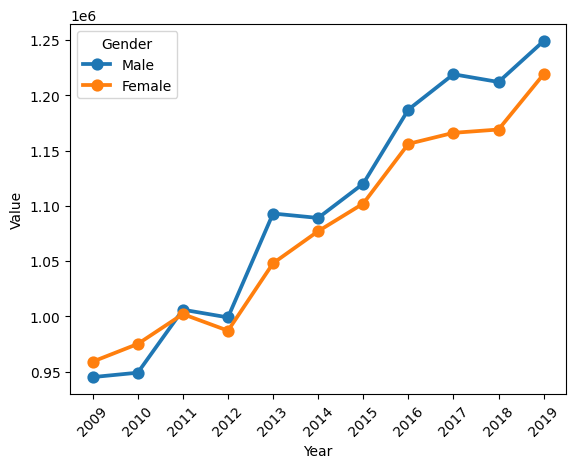

In [12]:
df_filtered = df_melted[
    (df_melted["Sector"] == "Professional, scientific and technical activities") & (df_melted["Gender"] != "Total")
]
sns.pointplot(x="Year", y="Value", hue="Gender", data=df_filtered)
plt.xticks(rotation=45);

<Axes: xlabel='Year', ylabel='Value'>

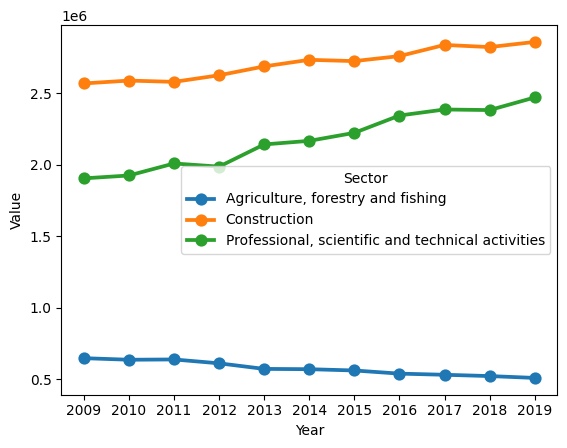

In [13]:
df_filtered = df_melted[
    (df_melted["Gender"] == "Total")
    & (
        (df_melted["Sector"] == "Agriculture, forestry and fishing")
        | (df_melted["Sector"] == "Professional, scientific and technical activities")
        | (df_melted["Sector"] == "Construction")
    )
]
fig, ax = plt.subplots()
sns.pointplot(x="Year", y="Value", hue="Sector", data=df_filtered)

<a id="groupby"></a>

### groupby

Group series using a series of columns or a mapper (dict or key function, apply given function to group, return result as series).

In [14]:
df

,Identifier,Sector,Year,Female,Male,Total
0,WZ08-A,"Agriculture, forestry and fishing",2009,220000,428000,648000
1,WZ08-A,"Agriculture, forestry and fishing",2010,214000,423000,637000
2,WZ08-A,"Agriculture, forestry and fishing",2011,213000,426000,639000
3,WZ08-A,"Agriculture, forestry and fishing",2012,200000,413000,612000
4,WZ08-A,"Agriculture, forestry and fishing",2013,186000,387000,573000
...,...,...,...,...,...,...
226,WZ08-U,Extraterritorial organisations and bodies,2015,8000,11000,18000
227,WZ08-U,Extraterritorial organisations and bodies,2016,8000,10000,19000
228,WZ08-U,Extraterritorial organisations and bodies,2017,10000,11000,21000
229,WZ08-U,Extraterritorial organisations and bodies,2018,11000,11000,22000


In [15]:
# create group object
comp = df.groupby("Sector")
comp

In [16]:
# apply max function to find the max value of each one of the group columns
# here, I pass numeric_only=True because the string column has no
comp.max(numeric_only=True)

,Year,Female,Male,Total
Sector,,,,
Accommodation and food service activities,2019,885000,720000,1585000
Administrative and support service activities,2019,1053000,1091000,2143000
"Agriculture, forestry and fishing",2019,220000,428000,648000
"Arts, entertainment and recreation",2019,289000,300000,590000
Construction,2019,421000,2447000,2857000
Education,2019,2069000,812000,2881000
"Electricity, gas, steam, air conditioning supply",2019,92000,285000,377000
Extraterritorial organisations and bodies,2019,13000,18000,32000
Financial and insurance activities,2019,669000,660000,1323000


In [17]:
# apply std function
comp.std(numeric_only=True)

,Year,Female,Male,Total
Sector,,,,
Accommodation and food service activities,3.316625,7942.978603,38009.089822,40803.965939
Administrative and support service activities,3.316625,36227.814528,50454.479934,71115.527009
"Agriculture, forestry and fishing",3.316625,20422.358514,29502.850402,49785.540069
"Arts, entertainment and recreation",3.316625,7672.856526,11061.809814,17526.084456
Construction,3.316625,30572.417753,77774.148544,106575.879925
Education,3.316625,152236.060714,25606.107226,174556.060284
"Electricity, gas, steam, air conditioning supply",3.316625,4080.998095,16667.878744,18171.906389
Extraterritorial organisations and bodies,3.316625,1990.888335,2879.393876,4657.350007
Financial and insurance activities,3.316625,12628.971023,16880.865984,26270.965653


In [18]:
# apply count function
comp.count()

,Identifier,Year,Female,Male,Total
Sector,,,,,
Accommodation and food service activities,11,11,11,11,11
Administrative and support service activities,11,11,11,11,11
"Agriculture, forestry and fishing",11,11,11,11,11
"Arts, entertainment and recreation",11,11,11,11,11
Construction,11,11,11,11,11
Education,11,11,11,11,11
"Electricity, gas, steam, air conditioning supply",11,11,11,11,11
Extraterritorial organisations and bodies,11,11,11,11,11
Financial and insurance activities,11,11,11,11,11


In [19]:
df_melted

,Sector,Year,Gender,Value
0,"Agriculture, forestry and fishing",2009,Male,428000
1,"Agriculture, forestry and fishing",2010,Male,423000
2,"Agriculture, forestry and fishing",2011,Male,426000
3,"Agriculture, forestry and fishing",2012,Male,413000
4,"Agriculture, forestry and fishing",2013,Male,387000
...,...,...,...,...
688,Extraterritorial organisations and bodies,2015,Total,18000
689,Extraterritorial organisations and bodies,2016,Total,19000
690,Extraterritorial organisations and bodies,2017,Total,21000
691,Extraterritorial organisations and bodies,2018,Total,22000


In [20]:
# we can group by multiple columns, and we can apply a function in-line
# and we can save it as a new dataframe
comp_cmd = df_melted.groupby(["Sector", "Gender"]).max()
comp_cmd

Year    Value
Sector                                             Gender               
Accommodation and food service activities          Female  2019   885000
                                                   Male    2019   720000
                                                   Total   2019  1585000
Administrative and support service activities      Female  2019  1053000
                                                   Male    2019  1091000
                                                   Total   2019  2143000
Agriculture, forestry and fishing                  Female  2019   220000
                                                   Male    2019   428000
                                                   Total   2019   648000
Arts, entertainment and recreation                 Female  2019   289000
                                                   Male    2019   300000
                                                   Total   2019   590000
Construction                                       Female  2019   421000
                                                   Male    2019  2447000
                                                   Total   2019  2857000
Education                                          Female  2019  2069000
                                                   Male    2019   812000
                                                   Total   2019  2881000
Electricity, gas, steam, air conditioning supply   Female  2019    92000
                                                   Male    2019   285000
                                                   Total   2019   377000
Extraterritorial organisations and bodies          Female  2019    13000
                                                   Male    2019    18000
                                                   Total   2019    32000
Financial and insurance activities                 Female  2019   669000
                                                   Male    2019   660000
                                                   Total   2019  1323000
Human health and social work activities            Female  2019  4314000
                                                   Male    2019  1297000
                                                   Total   2019  5611000
Information and communication                      Female  2019   438000
                                                   Male    2019   931000
                                                   Total   2019  1369000
Manufacturing                                      Female  2019  2191000
                                                   Male    2019  5831000
                                                   Total   2019  8010000
Mining and quarrying                               Female  2019    13000
                                                   Male    2019    91000
                                                   Total   2019   104000
Other service activities                           Female  2019   814000
                                                   Male    2019   386000
                                                   Total   2019  1182000
Private households                                 Female  2019   225000
                                                   Male    2019    15000
                                                   Total   2019   236000
Professional, scientific and technical activities  Female  2019  1219000
                                                   Male    2019  1249000
                                                   Total   2019  2469000
Public admin. and defence, compulsory social sec.  Female  2019  1483000
                                                   Male    2019  1547000
                                                   Total   2019  2905000
Real estate activities                             Female  2019   140000
                                                   Male    2019   136000
                                            

In [21]:
comp_cmd.index

MultiIndex([(         'Accommodation and food service activities', 'Female'),
            (         'Accommodation and food service activities',   'Male'),
            (         'Accommodation and food service activities',  'Total'),
            (     'Administrative and support service activities', 'Female'),
            (     'Administrative and support service activities',   'Male'),
            (     'Administrative and support service activities',  'Total'),
            (                 'Agriculture, forestry and fishing', 'Female'),
            (                 'Agriculture, forestry and fishing',   'Male'),
            (                 'Agriculture, forestry and fishing',  'Total'),
            (                'Arts, entertainment and recreation', 'Female'),
            (                'Arts, entertainment and recreation',   'Male'),
            (                'Arts, entertainment and recreation',  'Total'),
            (                                      'Construction

In [22]:
comp_cmd.loc["Professional, scientific and technical activities"]

,Year,Value
Gender,,
Female,2019,1219000
Male,2019,1249000
Total,2019,2469000


In [23]:
comp_cmd.loc["Professional, scientific and technical activities", "Total"]

Year        2019
Value    2469000
Name: (Professional, scientific and technical activities, Total), dtype: int64

In [24]:
comp_cmd["Value"]

Sector                                              Gender
Accommodation and food service activities           Female     885000
                                                    Male       720000
                                                    Total     1585000
Administrative and support service activities       Female    1053000
                                                    Male      1091000
                                                    Total     2143000
Agriculture, forestry and fishing                   Female     220000
                                                    Male       428000
                                                    Total      648000
Arts, entertainment and recreation                  Female     289000
                                                    Male       300000
                                                    Total      590000
Construction                                        Female     421000
                               

In [25]:
comp_cmd["Value"]["Professional, scientific and technical activities"]

Gender
Female    1219000
Male      1249000
Total     2469000
Name: Value, dtype: int64

In [26]:
comp_cmd["Value"]["Professional, scientific and technical activities", "Total"]

np.int64(2469000)

In [27]:
type(comp_cmd["Value"])

pandas.core.series.Series

You may want to ***not*** have the columns you are grouping by become your index. This can be easily achieved as shown below.

In [28]:
comp_cmd2 = df_melted.groupby(["Sector", "Gender"], as_index=False).max()
comp_cmd2

,Sector,Gender,Year,Value
0,Accommodation and food service activities,Female,2019,885000
1,Accommodation and food service activities,Male,2019,720000
2,Accommodation and food service activities,Total,2019,1585000
3,Administrative and support service activities,Female,2019,1053000
4,Administrative and support service activities,Male,2019,1091000
5,Administrative and support service activities,Total,2019,2143000
6,"Agriculture, forestry and fishing",Female,2019,220000
7,"Agriculture, forestry and fishing",Male,2019,428000
8,"Agriculture, forestry and fishing",Total,2019,648000
9,"Arts, entertainment and recreation",Female,2019,289000


In [29]:
comp_cmd2.index

RangeIndex(start=0, stop=63, step=1)

### pivot

Reshape dataframe from long format to wide format. That is, produce a "pivot" table based on column values. Uses unique values from index / columns to form axes of the resulting DataFrame.

`df.pivot(columns, index, values)`

* `columns`: string or object. Column name to use to make new frame's columns
* `index`: string or object. Column name to use to make new frame's index. If not given, uses existing index.
* `values`: string or object. Column name to use for populating new frame's values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns

<center>
<img src="../images/reshaping_pivot.png" width="60%"/>
</center>

In [30]:
# example 1:

df = pd.DataFrame(
    {
        "foo": ["one", "one", "one", "two", "two", "two"],
        "bar": ["A", "B", "C", "A", "B", "C"],
        "baz": [1, 2, 3, 4, 5, 6],
        "faz": [1, 2, 3, 4, 5, 6],
    }
)
df

,foo,bar,baz,faz
0,one,A,1,1
1,one,B,2,2
2,one,C,3,3
3,two,A,4,4
4,two,B,5,5
5,two,C,6,6


In [31]:
df.pivot(index="foo", columns="bar", values="baz").columns

Index(['A', 'B', 'C'], dtype='object', name='bar')

In [32]:
df_pivot = df.pivot(index="foo", columns="bar")
df_pivot

baz       faz      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   1  2  3
two   4  5  6   4  5  6

In [33]:
df_pivot["baz"]

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [34]:
# columns is multi-level
df_pivot.columns

MultiIndex([('baz', 'A'),
            ('baz', 'B'),
            ('baz', 'C'),
            ('faz', 'A'),
            ('faz', 'B'),
            ('faz', 'C')],
           names=[None, 'bar'])

In [35]:
# index is not multi-level
df_pivot.index

Index(['one', 'two'], dtype='object', name='foo')

In [36]:
# example 2: transofrm a dataframe that's "stacked"
df2 = df_melted
df2

,Sector,Year,Gender,Value
0,"Agriculture, forestry and fishing",2009,Male,428000
1,"Agriculture, forestry and fishing",2010,Male,423000
2,"Agriculture, forestry and fishing",2011,Male,426000
3,"Agriculture, forestry and fishing",2012,Male,413000
4,"Agriculture, forestry and fishing",2013,Male,387000
...,...,...,...,...
688,Extraterritorial organisations and bodies,2015,Total,18000
689,Extraterritorial organisations and bodies,2016,Total,19000
690,Extraterritorial organisations and bodies,2017,Total,21000
691,Extraterritorial organisations and bodies,2018,Total,22000


If we wanted all the data for variable "Female", we could do this:

In [37]:
df2[df2["Gender"] == "Female"]

,Sector,Year,Gender,Value
231,"Agriculture, forestry and fishing",2009,Female,220000
232,"Agriculture, forestry and fishing",2010,Female,214000
233,"Agriculture, forestry and fishing",2011,Female,213000
234,"Agriculture, forestry and fishing",2012,Female,200000
235,"Agriculture, forestry and fishing",2013,Female,186000
...,...,...,...,...
457,Extraterritorial organisations and bodies,2015,Female,8000
458,Extraterritorial organisations and bodies,2016,Female,8000
459,Extraterritorial organisations and bodies,2017,Female,10000
460,Extraterritorial organisations and bodies,2018,Female,11000


But suppose we wish to do time series operations with the variables. A better representation would be where the columns are the unique variables and an index of dates identifies individual observations. 

In [38]:
# to reshape the data into this form, use the pivot function
df2_pivot = df2.pivot(index=["Sector", "Year"], columns="Gender", values="Value")
df2_pivot

Gender                                                   Female     Male  \
Sector                                            Year                     
Accommodation and food service activities         2009   871000   620000   
                                                  2010   861000   630000   
                                                  2011   867000   607000   
                                                  2012   875000   630000   
                                                  2013   878000   633000   
...                                                         ...      ...   
Wholesale, retail trade, repair of motor vehicles 2015  2906000  2765000   
                                                  2016  2957000  2865000   
                                                  2017  2927000  2894000   
                                                  2018  2898000  2938000   
                                                  2019  2849000  2929000   

Gender                                                    Total  
Sector                                            Year           
Accommodation and food service activities         2009  1491000  
                                                  2010  1491000  
                                                  2011  1474000  
                                                  2012  1505000  
                                                  2013  1511000  
...                                                         ...  
Wholesale, retail trade, repair of motor vehicles 2015  5671000  
                                                  2016  5823000  
                                                  2017  5821000  
                                                  2018  5836000  
                                                  2019  5778000  

[231 rows x 3 columns]

We can also go further: if the goal here is to figure out is to compare the "Sector", we can pivot that column instead. Notice how the sorting of columns is not optimal because it sorts first the sector:

In [39]:
df2_pivot_sector = df2.pivot(index="Year", columns=["Sector", "Gender"], values="Value")
df2_pivot_sector

Sector,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam, air conditioning supply","Water supply,sewerage,waste management,remediation",Construction,"Wholesale, retail trade, repair of motor vehicles",Transportation and storage,Accommodation and food service activities,Information and communication,...,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,"Public admin. and defence, compulsory social sec.",Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Private households,Extraterritorial organisations and bodies
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
Year,,,,,,,,,,,,,,,,,,,,,
2009,428000,91000,5737000,253000,180000,2243000,2437000,1369000,620000,796000,...,276000,1904000,1936000,2823000,2376000,4643000,538000,1145000,203000,29000
2010,423000,85000,5658000,265000,168000,2253000,2473000,1365000,630000,810000,...,267000,1924000,2028000,2857000,2380000,4803000,552000,1123000,208000,32000
2011,426000,86000,5602000,275000,178000,2248000,2440000,1377000,607000,818000,...,269000,2008000,2040000,2764000,2426000,4856000,529000,1110000,222000,27000
2012,413000,84000,5618000,285000,177000,2292000,2472000,1408000,630000,855000,...,271000,1986000,2067000,2758000,2474000,4943000,551000,1110000,217000,26000
2013,387000,74000,5553000,262000,171000,2339000,2809000,1431000,633000,762000,...,221000,2141000,1928000,2791000,2547000,4922000,533000,1182000,236000,20000
2014,383000,77000,5674000,245000,184000,2369000,2738000,1439000,656000,767000,...,195000,2166000,1955000,2796000,2594000,5031000,538000,1151000,231000,21000
2015,382000,72000,5653000,250000,189000,2364000,2765000,1471000,665000,796000,...,213000,2222000,2022000,2757000,2639000,5172000,560000,1138000,217000,18000
2016,369000,73000,5761000,243000,183000,2390000,2865000,1513000,694000,847000,...,216000,2343000,2064000,2885000,2687000,5353000,558000,1170000,227000,19000


### pivot_table

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame. Similar to `pivot`, it is a generalization of pivot that can handle duplicate values for one index/column pair.

```python
df.pivot_table(
    values=None, 
    index=None, 
    columns=None, 
    aggfunc="mean", 
    fill_value=None, 
    margins=False, 
    dropna=True, 
    margins_name='All'
)
```

In [40]:
df = pd.DataFrame(
    {
        "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
        "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
        "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
        "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
    }
)
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [41]:
table = pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc="sum")
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

Back to our dataset, we can achieve the exact same result.

In [42]:
df2.pivot_table(index="Year", columns=["Sector", "Gender"], values="Value")

Sector Accommodation and food service activities                       \
Gender                                    Female      Male      Total   
Year                                                                    
2009                                    871000.0  620000.0  1491000.0   
2010                                    861000.0  630000.0  1491000.0   
2011                                    867000.0  607000.0  1474000.0   
2012                                    875000.0  630000.0  1505000.0   
2013                                    878000.0  633000.0  1511000.0   
2014                                    874000.0  656000.0  1529000.0   
2015                                    884000.0  665000.0  1549000.0   
2016                                    885000.0  694000.0  1579000.0   
2017                                    883000.0  691000.0  1574000.0   
2018                                    872000.0  702000.0  1573000.0   
2019                                    865000.0  720000.0  1585000.0   

Sector Administrative and support service activities                        \
Gender                                        Female       Male      Total   
Year                                                                         
2009                                        948000.0   988000.0  1936000.0   
2010                                        969000.0  1059000.0  2028000.0   
2011                                        968000.0  1072000.0  2040000.0   
2012                                        997000.0  1070000.0  2067000.0   
2013                                        984000.0   944000.0  1928000.0   
2014                                        997000.0   958000.0  1955000.0   
2015                                       1031000.0   991000.0  2022000.0   
2016                                       1024000.0  1039000.0  2064000.0   
2017                                       1042000.0  1065000.0  2107000.0   
2018                                       1049000.0  1049000.0  2098000.0   
2019                                       1053000.0  1091000.0  2143000.0   

Sector Agriculture, forestry and fishing                      \
Gender                            Female      Male     Total   
Year                                                           
2009                            220000.0  428000.0  648000.0   
2010                            214000.0  423000.0  637000.0   
2011                            213000.0  426000.0  639000.0   
2012                            200000.0  413000.0  612000.0   
2013                            186000.0  387000.0  573000.0   
2014                            188000.0  383000.0  571000.0   
2015                            180000.0  382000.0  562000.0   
2016                            171000.0  369000.0  540000.0   
2017                            171000.0  361000.0  532000.0   
2018                            165000.0  358000.0  523000.0   
2019                            165000.0  346000.0  510000.0   

Sector Arts, entertainment and recreation  ... Real estate activities  \
Gender                             Female  ...                  Total   
Year                                       ...                          
2009                             263000.0  ...               276000.0   
2010                             273000.0  ...               267000.0   
2011                             269000.0  ...               269000.0   
2012                             277000.0  ...               271000.0   
2013                             266000.0  ...               221000.0   
2014                             268000.0  ...               195000.0   
2015                             269000.0  ...               213000.0   
2016                             276000.0  ...               216000.0   
2017                             283000.0  ...               206000.0   
2018                             275000.0  ...               207000.0   
2019                             28900

In [43]:
df2_pivot_table_sum = df2.pivot_table(index="Year", columns=["Gender"], values="Value", aggfunc="sum")
df2_pivot_table_sum

Gender,Female,Male,Total
Year,,,
2009,17690000,20972000,38662000
2010,17891000,21049000,38940000
2011,18021000,20894000,38916000
2012,18138000,21066000,39205000
2013,18425000,21195000,39618000
2014,18598000,21345000,39942000
2015,18788000,21490000,40277000
2016,19231000,22105000,41340000
2017,19368000,22274000,41641000


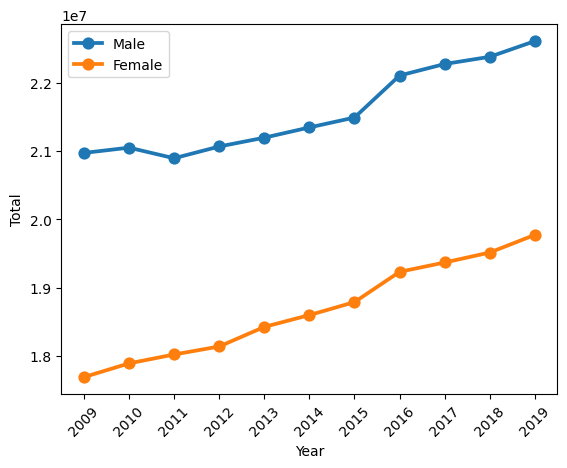

In [44]:
ax = sns.pointplot(x="Year", y="Male", data=df2_pivot_table_sum, label="Male")
sns.pointplot(x="Year", y="Female", data=df2_pivot_table_sum, label="Female")
ax.set(ylabel="Total")
plt.xticks(rotation=45);

### stack

Pivot a level of the column labels (inverse operation from `unstack`).

`df.stack(level=-1, dropna=True)`

* `level`: int, string, or list of these, default last level. Level(s) to stack, can pass level name
* `dropna`: boolean, default True. Whether to drop rows in the resulting Frame/Series with no valid values

In [45]:
df2 = pd.DataFrame(
    np.random.randint(0, 9, size=(5, 3)),
    index=("sample1", "sample2", "sample3", "sample4", "sample5"),
    columns=("feature1", "feature2", "feature3"),
)
df2

,feature1,feature2,feature3
sample1,6,5,1
sample2,1,2,3
sample3,6,6,3
sample4,4,4,8
sample5,6,8,3


In [46]:
df2_stack = df2.stack()
df2_stack

sample1  feature1    6
         feature2    5
         feature3    1
sample2  feature1    1
         feature2    2
         feature3    3
sample3  feature1    6
         feature2    6
         feature3    3
sample4  feature1    4
         feature2    4
         feature3    8
sample5  feature1    6
         feature2    8
         feature3    3
dtype: int64

In [47]:
df2_stack["sample1"]

feature1    6
feature2    5
feature3    1
dtype: int64

In [48]:
df2_stack["sample1"]["feature1"]

np.int64(6)

### unstack

Pivot based on the index values, instead of a column. Requires hierarchical index labels, returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

`df.unstack(level=-1, fill_value=None)`

* `level`: int, string, or list of these, default -1 (last level) Level(s) of index to unstack, can pass level name
* `fill_value`: replace NaN with this value if the unstack produces missing values

In [49]:
df2_unstack = df2.unstack()
df2_unstack

feature1  sample1    6
          sample2    1
          sample3    6
          sample4    4
          sample5    6
feature2  sample1    5
          sample2    2
          sample3    6
          sample4    4
          sample5    8
feature3  sample1    1
          sample2    3
          sample3    3
          sample4    8
          sample5    3
dtype: int64

In [50]:
df2_unstack["feature1"]

sample1    6
sample2    1
sample3    6
sample4    4
sample5    6
dtype: int64

In [51]:
df2_unstack["feature1"]["sample1"]

np.int64(6)

In [52]:
type(df2), type(df2_stack), type(df2_unstack)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

### value_counts

Get the counts of each value in a Series.

In [53]:
df2.feature1.value_counts()

feature1
6    3
1    1
4    1
Name: count, dtype: int64

Example: Use `value_counts` to find features found in more than 3 samples:

In [54]:
df2 = df2.astype(bool)

In [55]:
for feature in df2.columns:
    num_true = df2[feature].value_counts()[True]
    if num_true > 3:
        print(feature, num_true)

feature1 5
feature2 5
feature3 5


### Example: Group operations with Foreigners statistics Germany

I have already downloaded and transformed the data from [Statistisches Bundesamt, Code 12521-0008, Foreigners](https://www-genesis.destatis.de/datenbank/online/url/ec69ac3a), that contains foreigners statitics from the period 1998-2019, compiled per origin and type of visa. The data was transformed to be reduced and size and aggregated, so let's load it:

**Disclaimer**: The original dataset includes "Europe" with separate statistics for members of the EU and third states in the gradual change over the years, as new members join the block. I have decided to generalize "Europe" as a whole for simplicity. I have also used the aggregates for all continents even though are are big differences between North vs Central America.

Because of the generalizations, and because the dataset does not disclaim which aggregates are overlapping, the data might not fully reflect reality.

In [56]:
df = pd.read_csv("../data/12521-0008-foreigners_germany_until_2019.csv", parse_dates=["Date"])
df

,Date,Origin,Residence permit,Male,Female
0,1998-12-31,Europe,Right of resid. acc.to EU Law on Freedom of Mo...,1043027,831625
1,1998-12-31,Europe,Exempted from requirem. to have a residence title,44693,35154
2,1998-12-31,Europe,Unlimited settlement permit,985205,849008
3,1998-12-31,Europe,Temporary residence permit,702740,683003
4,1998-12-31,Europe,"Temp.resid.permit f.special reasons,national v...",702740,683003
...,...,...,...,...,...
1264,2019-12-31,Australia and Oceania,"Temp.res.perm.for reas.of int.law,hum.,pol.rea...",15,20
1265,2019-12-31,Australia and Oceania,Temporary residence permit for family reasons,1330,1125
1266,2019-12-31,Australia and Oceania,"Temp.resid.permit f.special reasons,national v...",535,465
1267,2019-12-31,Australia and Oceania,Application for residence title filed,565,395


In [57]:
df.dtypes

Date                datetime64[ns]
Origin                      object
Residence permit            object
Male                         int64
Female                       int64
dtype: object

The first step will be normalizing our data and bringing the "Gender" columns from the original dataset as another property. We will later decide if it comes in our pivot tables.

In [58]:
df_melted = pd.melt(df, id_vars=["Date", "Origin", "Residence permit"], var_name="Gender", value_name="Value")
df_melted

,Date,Origin,Residence permit,Gender,Value
0,1998-12-31,Europe,Right of resid. acc.to EU Law on Freedom of Mo...,Male,1043027
1,1998-12-31,Europe,Exempted from requirem. to have a residence title,Male,44693
2,1998-12-31,Europe,Unlimited settlement permit,Male,985205
3,1998-12-31,Europe,Temporary residence permit,Male,702740
4,1998-12-31,Europe,"Temp.resid.permit f.special reasons,national v...",Male,702740
...,...,...,...,...,...
2533,2019-12-31,Australia and Oceania,"Temp.res.perm.for reas.of int.law,hum.,pol.rea...",Female,20
2534,2019-12-31,Australia and Oceania,Temporary residence permit for family reasons,Female,1125
2535,2019-12-31,Australia and Oceania,"Temp.resid.permit f.special reasons,national v...",Female,465
2536,2019-12-31,Australia and Oceania,Application for residence title filed,Female,395


The goal of pivot is transforming the DataFrame into something we can visualize better. We will not give emphasis on conparing "Origin" vs "Date", to focus on the timeline evolution:

In [59]:
df_melted.pivot_table(index=["Origin"], columns="Date", values="Value", aggfunc="sum")

Date,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
Origin,,,,,,,,,,,,,,,,,,,,,
Africa,413496,414697,419371,427195,437435,443786,403061,399071,397943,397215,...,393493,392917,410266,447040,499170,573511,687195,757795,822535,876545
America,287335,296600,308943,318124,325953,332639,293722,299446,306192,310248,...,306958,316641,330134,342557,352463,361888,373220,389695,409845,429410
Asia,1117963,1166961,1215440,1286499,1341443,1370520,1255808,1249397,1238621,1228603,...,1223055,1239045,1306391,1394351,1564445,2094735,3014640,3419400,3676770,3877615
Australia and Oceania,15052,15280,15932,17311,18467,18930,14852,15411,16374,16753,...,17901,19705,20979,22004,22662,24391,26115,26905,27670,28420
Europe,7324301,7324406,7250500,7242059,7219044,7191948,6434323,6427600,6377040,6284130,...,6119335,6183394,6359607,6623001,6937356,7352684,7604020,8066440,8228435,8424440


But what if we want to instead focus on the "Gender" evolution over time? We can do that too:

In [60]:
df_melted.pivot_table(index=["Gender"], columns="Date", values="Value", aggfunc="sum")

Date,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
Gender,,,,,,,,,,,,,,,,,,,,,
Female,4195061,4252925,4282383,4349255,4413192,4463326,4090988,4121510,4116668,4078720,...,4016978,4046362,4158876,4319284,4541475,4913149,5421710,5847225,6105915,6355235
Male,4963086,4965019,4927803,4941933,4929150,4894497,4310778,4269415,4219502,4158229,...,4043764,4105340,4268501,4509669,4834621,5494060,6283480,6813010,7059340,7281195


We can now transpose and plot the results:

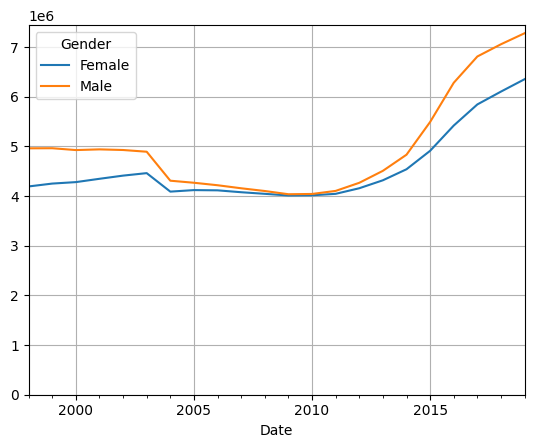

In [61]:
ax = df_melted.pivot_table(index=["Gender"], columns="Date", values="Value", aggfunc="sum").transpose().plot(grid=True)
ax.set_ylim(ymin=0);

We can do the same thing for the total values:

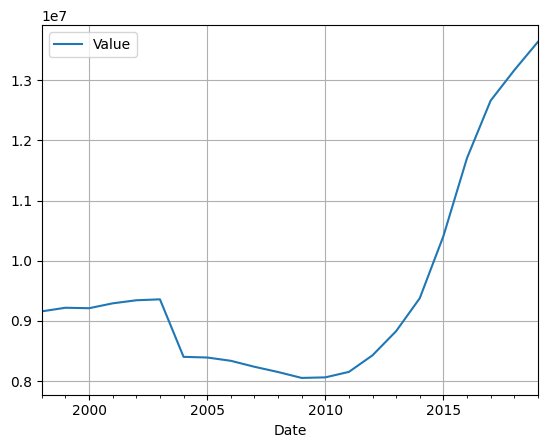

In [62]:
ax = df_melted.pivot_table(index=None, columns="Date", values="Value", aggfunc="sum").transpose().plot(grid=True)
# Change the line below to see how our perception can be influenced by choice of plots ;)
# ax.set_ylim(ymin=0, ymax=2e7);

If we want to focus on type of residence, we can do that too by pivotting again. 

This time, I'll first group our dataset by the primary keys, get the last result, then pivot again to have statistics only from the latest sampling period:

In [63]:
df_permits = (
    df_melted.groupby(["Origin", "Residence permit", "Gender"])
    .last("Date")
    .reset_index()
    .pivot_table(index=["Origin"], columns="Residence permit", values="Value", aggfunc="sum")
)
df_permits

Residence permit,Application for residence title filed,Exempted from requirem. to have a residence title,"No res.title, temp.susp. of dep. or perm.to reside",Permission to reside,Right of resid. acc.to EU Law on Freedom of Movem.,"Temp.res.perm.for reas.of int.law,hum.,pol.reasons","Temp.resid.permit f.special reasons,national visas",Temporary residence permit,Temporary residence permit for education purposes,Temporary residence permit for employment purposes,Temporary residence permit for family reasons,Temporary suspension of deportation,Unlimited settlement permit
Origin,,,,,,,,,,,,,
Africa,39330,390,45340,63885,13570,119785,13045,275610,32795,13520,96465,48900,113910
America,17790,2410,21845,2150,14680,1590,10540,132700,32080,37975,50515,820,104315
Asia,156220,490,134700,153275,17640,872755,35340,1469285,134225,91690,335285,91935,384775
Australia and Oceania,960,55,1190,15,680,35,1000,10080,1400,5190,2455,10,5375
Europe,83450,4040,120195,38360,4992170,87415,67855,634605,30775,110065,338500,53615,1863395


The transpose here will be easier to see since there are less entries on the index:

In [64]:
df_permits.transpose()

Origin,Africa,America,Asia,Australia and Oceania,Europe
Residence permit,,,,,
Application for residence title filed,39330,17790,156220,960,83450
Exempted from requirem. to have a residence title,390,2410,490,55,4040
"No res.title, temp.susp. of dep. or perm.to reside",45340,21845,134700,1190,120195
Permission to reside,63885,2150,153275,15,38360
Right of resid. acc.to EU Law on Freedom of Movem.,13570,14680,17640,680,4992170
"Temp.res.perm.for reas.of int.law,hum.,pol.reasons",119785,1590,872755,35,87415
"Temp.resid.permit f.special reasons,national visas",13045,10540,35340,1000,67855
Temporary residence permit,275610,132700,1469285,10080,634605
Temporary residence permit for education purposes,32795,32080,134225,1400,30775
